In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/My Drive/Proyecto_CD/"
#path="C:/Users/110395/OneDrive/Documentos/Maestria/Temas Datos/Proyecto/Datos/"

Mounted at /content/drive


## Lectura de datos

In [ ]:
#Se carga sin la variable $\texttt{tempo}$ ya que contiene muchos NaN's. Notamos también que la variable $\texttt{competencia}$ 
#nos marca muchos NaN's, sin embargo, en la fuente de dónde se descargó el archivo no presenta NaN's.
FGJ_carpetas = pd.read_csv(path+'Datos/'+'carpetas_completa_junio_2022.csv', index_col=0,dtype={"competencia" : str},
                           usecols= lambda x: x != 'tempo')

In [ ]:
#Los datos de los servicios brindados en locatel se encotraban dispersos en 3 archivos, por lo cual se cargo cada uno de ellos
#y despues se apilaron para tener un solo archivo
dato1 = pd.read_csv(path+'Datos/'+'servicios_integrales_2016-2018.csv')
dato2 = pd.read_csv(path+'Datos/'+'servicios_integrales_2019-2021.csv')
dato3 = pd.read_csv(path+'Datos/'+'servicios_integrales_20220816.csv')
llamadas=pd.concat([dato1,dato2,dato3], sort=False)

## Preprocesamiento

In [ ]:
#Cambiamos el tipo de datos de las columnas referentes a fechas
FGJ_carpetas["fecha_hechos"] = pd.to_datetime(FGJ_carpetas["fecha_hechos"], format = "%Y-%m-%d %H:%M:%S", errors = "coerce")
FGJ_carpetas["fecha_inicio"] = pd.to_datetime(FGJ_carpetas["fecha_inicio"], format = "%Y-%m-%d %H:%M:%S", errors = "coerce")
llamadas["FECHA_ALTA"]=pd.to_datetime(llamadas.FECHA_ALTA,format='%Y-%m-%d',errors = "coerce")

Buscamos y eliminaos NA en los campos importantes para el estudio posterior como lo son la fecha del hecho delictivo o la colonia donde ocurrio el delito

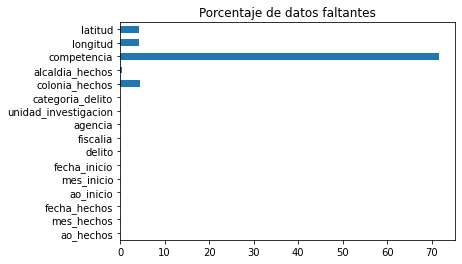

In [ ]:
porcent_miss = FGJ_carpetas.isna().sum()/len(FGJ_carpetas)*100
porcent_miss.plot(kind = "barh", title = "Porcentaje de datos faltantes")
'''plt.savefig(path+'IMG/'+'carpetas_na.png',
            bbox_inches ="tight",
            pad_inches = 0.2,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')'''
plt.show()

In [ ]:
#Eliminamos la columna competencia del estudio debido a que mas del 70% de los registros son NA
FGJ_carpetas.drop(columns=["competencia"], inplace = True)

In [ ]:
#Eliminacion de NA
#FGJ_carpetas.dropna(inplace=True,subset=['colonia_hechos','fecha_hechos','latitud','longitud'])
FGJ_carpetas.dropna(inplace=True)

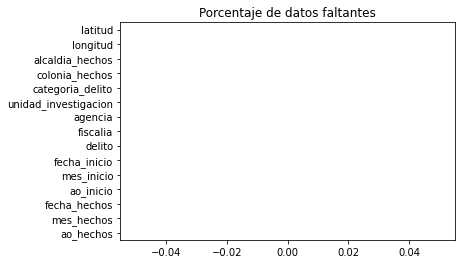

In [ ]:
porcent_miss = FGJ_carpetas.isna().sum()/len(FGJ_carpetas)*100
porcent_miss.plot(kind = "barh", title = "Porcentaje de datos faltantes")
plt.show()

Realizamos un procedimiento analogo en la base de datos de llamadas

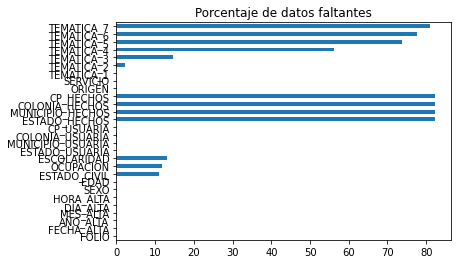

In [ ]:
porcent_miss = llamadas.isna().sum()/len(llamadas)*100
porcent_miss.plot(kind = "barh", title = "Porcentaje de datos faltantes")
'''plt.savefig(path+'IMG/'+'llamadas_na.png',
            bbox_inches ="tight",
            pad_inches = 0.5,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')'''
plt.show()

In [ ]:
#Eliminamos las columnas de temanticas 2 a la 7 del estudio debido a que mas del 70% de los registros son NA
llamadas.drop(columns=["TEMATICA_2","TEMATICA_3","TEMATICA_4","TEMATICA_5","TEMATICA_6","TEMATICA_7"], inplace = True)
#Eliminamos las columnas de información de hechos por su alto nivel de información faltante
#En la documentacion comentan que se omitia la parte de información de hechos si era la misma que la de la usuaria
llamadas.drop(columns=["COLONIA_HECHOS","CP_HECHOS","MUNICIPIO_HECHOS","ESTADO_HECHOS"], inplace = True)

In [ ]:
#Eliminacion de NA
llamadas.dropna(inplace=True,subset=['ESCOLARIDAD','OCUPACION','ESTADO_CIVIL','COLONIA_USUARIA','TEMATICA_1'])

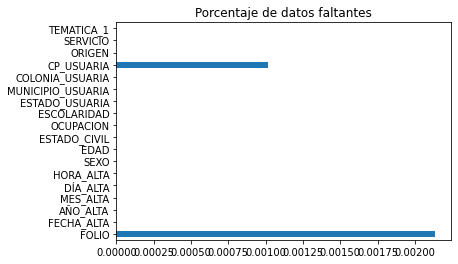

In [ ]:
porcent_miss = llamadas.isna().sum()/len(llamadas)*100
porcent_miss.plot(kind = "barh", title = "Porcentaje de datos faltantes")
plt.show()

Seleccionamos una parte de interes de nuestros datos

In [ ]:
FGJ_carpetas = FGJ_carpetas[FGJ_carpetas["ao_hechos"] > 2015]

In [ ]:
#Buscamos las llamadas de las personas de la ciudad de mexco
llamadas=llamadas.loc[llamadas["ESTADO_USUARIA"]=='CIUDAD DE MÉXICO',:]

Guardamos los archivos con la informacion necesaria para el analisis posteriror

In [ ]:
FGJ_carpetas.to_csv(path+"FGJ_carpetas.csv",index=False)

In [ ]:
llamadas.to_csv(path+"llamadas.csv",index=False)

## ANÁLISIS ESTADISTICO EXPLORATORIO

### Cargamos nuestros datos

Definimos como variables de tipo `fecha` a $\texttt{fecha_hechos}$ y $\texttt{fecha_inicio}$ y eliminamos dos columnas ($\texttt{ao_inicio}$ y $\texttt{mes_inicio}$) de la base de datos original, ya que sería utilizar información repetida. Realizamos un procedimiento analogo para el archivo de llamadas.

In [ ]:
FGJ_carpetas = pd.read_csv(path+'FGJ_carpetas.csv', parse_dates=["fecha_hechos", "fecha_inicio"])
FGJ_carpetas.drop(columns=["ao_inicio", "mes_inicio","ao_hechos","mes_hechos"], inplace=True)
llamadas=pd.read_csv(path+'llamadas.csv',parse_dates=["FECHA_ALTA"])    
llamadas.drop(columns=["HORA_ALTA", "DÍA_ALTA","MES_ALTA","AÑO_ALTA"], inplace=True)

Definimos como indicies las fechas cuando ocurrieron los hechos delictivos, es decir, con la variable $\texttt{fecha_hechos}$

In [ ]:
FGJ_carpetas.index = pd.DatetimeIndex(FGJ_carpetas.fecha_hechos)
llamadas.index = pd.DatetimeIndex(llamadas.FECHA_ALTA)

Mostramos los primeros 3 registros, solo para comprobar como fueron cargados nuestros datos

In [ ]:
FGJ_carpetas.head(3)

In [ ]:
llamadas.head(3)

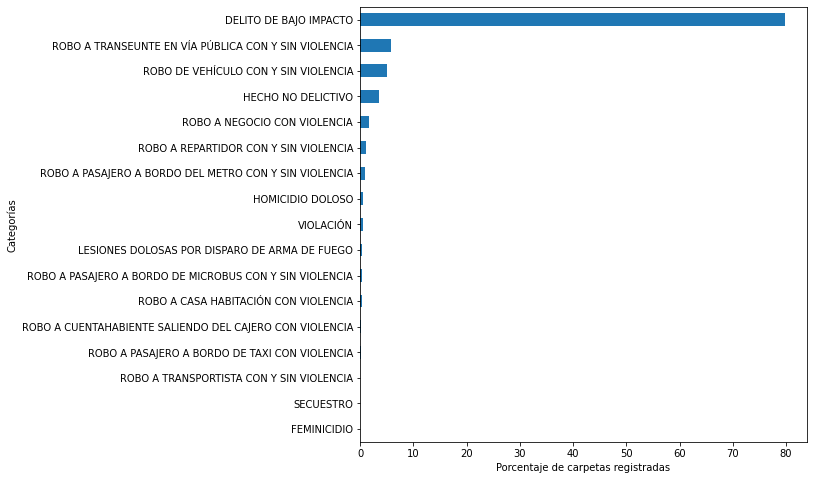

In [ ]:
plt.figure(figsize=(8,8))
(FGJ_carpetas.groupby([FGJ_carpetas['categoria_delito']]).size().sort_values(ascending=True)*100/len(FGJ_carpetas['categoria_delito'])).plot(kind='barh')
#plt.title('Número de carpetas por categoría')
plt.ylabel('Categorías')
plt.xlabel('Porcentaje de carpetas registradas')

plt.savefig(path+'IMG/'+'carpetas_cat.png',
            bbox_inches ="tight",
            pad_inches = 0.5,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')
plt.show()

In [ ]:
FGJ_carpetas.groupby([FGJ_carpetas['categoria_delito']]).size().sort_values(ascending=True)

categoria_delito
FEMINICIDIO                                                      1
SECUESTRO                                                      185
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                       649
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                 1414
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       2550
ROBO A CASA HABITACIÓN CON VIOLENCIA                          3480
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA       4738
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                 4765
VIOLACIÓN                                                     6696
HOMICIDIO DOLOSO                                              6872
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        11981
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                        14116
ROBO A NEGOCIO CON VIOLENCIA                                 22717
HECHO NO DELICTIVO                                           49673
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA         

Nos llama la atención la categoria de **Delitos de bajo impacto** debido a que contiene delitos que aparentemente son muy similares a otras categorias fuera de esta. También notamos que estas subcategorias tienen más registros que categorias que no son considerados como delitos de bajo impacto.

El trabajo que se realizará es analizar estas subcategorias, ver cuales podemos combinar (evitando la pérdida de información) y cuáles podemos destacar que se consideren relevantes.

In [ ]:
#!pip install unidecode

In [ ]:
subcat = pd.DataFrame(FGJ_carpetas[FGJ_carpetas["categoria_delito"] == 
                                   "DELITO DE BAJO IMPACTO"]["delito"].value_counts()).reset_index()

**Robo a pasajero**

Análizamos los delitos que esten relacionados con robo a pasajero dentro de los delitos con categoria de bajo impacto.


In [ ]:
subcat[subcat["index"].str.contains("ROBO A PASAJERO")]["index"].values

array(['ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA',
       'ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA',
       'ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TAXI SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA',
       'ROBO A PASAJERO EN RTP CON VIOLENCIA',
       'ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA',
       'ROBO A PASAJERO EN TROLEBUS CON VIOLENCIA',
       'ROBO A PASAJERO EN RTP SIN VIOLENCIA',
       'ROBO A PASAJERO EN AUTOBÚS FORÁNEO CON VIOLENCIA',
       'ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA',
       'ROBO A PASAJERO EN ECOBUS CON VIOLENCIA',
       'ROBO A PASAJERO EN ECOBUS SIN VIOLENCIA',
       'ROBO A PASAJERO EN AUTOBUS FORANEO SIN VIOLENCIA',
       'ROBO A PASAJERO EN TREN

In [ ]:
rob_pas = subcat[subcat["index"].str.contains("ROBO A PASAJERO")]
rob_pas.values

array([['ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA', 15564],
       ['ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA',
        6941],
       ['ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA', 3407],
       ['ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA',
        2407],
       ['ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA', 676],
       ['ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA', 534],
       ['ROBO A PASAJERO A BORDO DE TAXI SIN VIOLENCIA', 300],
       ['ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA', 258],
       ['ROBO A PASAJERO EN RTP CON VIOLENCIA', 226],
       ['ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA', 203],
       ['ROBO A PASAJERO EN TROLEBUS CON VIOLENCIA', 95],
       ['ROBO A PASAJERO EN RTP SIN VIOLENCIA', 72],
       ['ROBO A PASAJERO EN AUTOBÚS FORÁNEO CON VIOLENCIA', 56],
       ['ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA', 55],
       ['ROBO A PASAJERO EN ECOBUS CON VIOLENCIA', 32],
       ['ROBO A PAS

In [ ]:
rob_pas[rob_pas["index"].str.contains("CON VIOLENCIA")].values

array([['ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA', 15564],
       ['ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA',
        6941],
       ['ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA', 676],
       ['ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA', 258],
       ['ROBO A PASAJERO EN RTP CON VIOLENCIA', 226],
       ['ROBO A PASAJERO EN TROLEBUS CON VIOLENCIA', 95],
       ['ROBO A PASAJERO EN AUTOBÚS FORÁNEO CON VIOLENCIA', 56],
       ['ROBO A PASAJERO EN ECOBUS CON VIOLENCIA', 32],
       ['ROBO A PASAJERO EN TREN LIGERO CON VIOLENCIA', 15],
       ['ROBO A PASAJERO A BORDO DE PESERO Y VEHICULO CON VIOLENCIA', 11],
       ['ROBO A PASAJERO EN TREN SUBURBANO CON VIOLENCIA', 5],
       ['ROBO A PASAJERO A BORDO DE CABLEBUS CON VIOLENCIA', 1]],
      dtype=object)

In [ ]:
rob_pas[rob_pas["index"].str.contains("SIN VIOLENCIA")].values[:,0]

array(['ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA',
       'ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TAXI SIN VIOLENCIA',
       'ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA',
       'ROBO A PASAJERO EN RTP SIN VIOLENCIA',
       'ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA',
       'ROBO A PASAJERO EN ECOBUS SIN VIOLENCIA',
       'ROBO A PASAJERO EN AUTOBUS FORANEO SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE CABLEBUS SIN VIOLENCIA'], dtype=object)

**Robo a transeunte**

Ahora analizamos los delitos relacionados a robo a transeunte dentro de delito de bajo impacto.

In [ ]:
subcat[subcat["index"].str.contains("TRANSEUNTE")]["index"].values

**Re-etiquetación**

Se acordó manejar 4 tipos de variables relacionadas con delitos relacionados a transporte público:

1. Robo en taxi con y sin violencia
2. Robo en metro con y sin violencia
3. Robo en Microbus con y sin violencia
4. Robo en "Otros" tipos de transporte con y sin violencia


Para delitos sexuales manejaremos:

1. Violaciones
2. Otors delitos de índole sexual (abuso, acoso sexual, etc.)


La categoría feminicidio será eliminada debido a que solo hay un registro
Para delitos relacionados con robo a negocio los definiremos en 2 categorias:

1. Robo con violencia
2. Robo sin violencia


Para delitos relacionados con robo a casa haremos un esquema similar al anterior.

Finalmente, para delitos relacionados a robos a transeuntes los juntaremos con los robos a transeuntes en vía pública con y sin violencia.

Los principales 4 delitos con mayor registros dentro de los delitos de bajo impacto se analizarán por separado debido a su alto número de ocurrencias (los consideramos de interés).

In [ ]:
dic_homo = {"ROBO A PASAJERO A BORDO DE TAXI CON Y SIN VIOLENCIA" : ["ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA ", 
                                                                          "ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA", 
                                                                          "ROBO A PASAJERO A BORDO DE TAXI SIN VIOLENCIA"], 
            "ROBO A PASAJERO A BORDO DE OTROS TRANSPORTE CON Y SIN VIOLENCIA" : ['ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA', 
                                                                                 'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA', 
                                                                                 'ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA', 
                                                                                 'ROBO A PASAJERO EN RTP CON VIOLENCIA', 
                                                                                 'ROBO A PASAJERO EN TROLEBUS CON VIOLENCIA', 
                                                                                 'ROBO A PASAJERO EN AUTOBÚS FORÁNEO CON VIOLENCIA', 
                                                                                 'ROBO A PASAJERO EN ECOBUS CON VIOLENCIA', 
                                                                                 'ROBO A PASAJERO EN TREN LIGERO CON VIOLENCIA', 
                                                                                 'ROBO A PASAJERO A BORDO DE PESERO Y VEHICULO CON VIOLENCIA', 
                                                                                 'ROBO A PASAJERO EN TREN SUBURBANO CON VIOLENCIA', 
                                                                                 'ROBO A PASAJERO A BORDO DE CABLEBUS CON VIOLENCIA',
                                                                                'ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO SIN VIOLENCIA',
                                                                                 'ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA',
                                                                                 'ROBO A PASAJERO EN RTP SIN VIOLENCIA',
                                                                                'ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA',
                                                                                'ROBO A PASAJERO EN AUTOBUS FORANEO SIN VIOLENCIA',
                                                                                 'ROBO A PASAJERO EN ECOBUS SIN VIOLENCIA',
                                                                               'ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA',
                                                                                'ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA',
                                                                                'ROBO A PASAJERO A BORDO DE CABLEBUS SIN VIOLENCIA'], 
               "OTROS DELITOS DE INDOLE SEXUAL" : ['ABUSO SEXUAL', 
                                                   'ACOSO SEXUAL', 
                                                   'CONTRA LA INTIMIDAD SEXUAL', 
                                                   'ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES', 
                                                   'PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)'],
               "ROBO A NEGOCIO SIN VIOLENCIA" : ['ROBO A NEGOCIO SIN VIOLENCIA', 
                                                 'ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE AUTOSERVICIO)', 
                                                 'ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS', 
                                                 'ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIENDAS DE CONVENIENCIA)', 
                                                 'ROBO A NEGOCIO Y VEHICULO SIN VIOLENCIA'],
               "ROBO A CASA SIN VIOLENCIA" : ['ROBO A CASA HABITACION SIN VIOLENCIA', 
                                              'DAÑO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION', 
                                              'ROBO A CASA HABITACION Y VEHICULO SIN VIOLENCIA'], 
            "ROBO A TRANSEUNTE CON Y SIN VIOLENCIA" : ['ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA',
                                                          'ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA',
                                                          'ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA',
                                                          'ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA',
                                                          'ROBO A TRANSEUNTE CONDUCTOR DE TAXI PUBLICO Y PRIVADO CON VIOLENCIA',
                                                          'ROBO A TRANSEUNTE A BORDO DE TAXI PUBLICO Y PRIVADO SIN VIOLENCIA',
                                                          'ROBO A TRANSEUNTE EN RESTAURANT CON VIOLENCIA',
                                                          'ROBO A TRANSEUNTE EN HOTEL CON VIOLENCIA',
                                                          'ROBO A TRANSEUNTE EN TERMINAL DE PASAJEROS CON VIOLENCIA',
                                                          'ROBO A TRANSEUNTE Y VEHICULO CON VIOLENCIA',
                                                          'ROBO A TRANSEUNTE EN CINE CON VIOLENCIA'],
           "ROBO DE OBJETOS" : ["ROBO DE OBJETOS",
                                "ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO", 
                                "ROBO DE ACCESORIOS DE AUTO", 
                                "DESPOJO"]}

In [ ]:
FGJ_carpetas["delito_homo"] = FGJ_carpetas["delito"].replace({v: new_del for new_del, v in dic_homo.items() for 
                                                              delito in FGJ_carpetas.delito.astype("category") for v in v})

In [ ]:
FGJ_carpetas["categoria_delito_homo"] = FGJ_carpetas["categoria_delito"]

In [ ]:
for key in dic_homo.keys():
    FGJ_carpetas.loc[FGJ_carpetas["delito_homo"]==key, "categoria_delito_homo"] = key
    
FGJ_carpetas.loc[FGJ_carpetas["categoria_delito_homo"] == "ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA", 
                 "categoria_delito_homo"] = "ROBO A PASAJERO A BORDO DE TAXI CON Y SIN VIOLENCIA"

FGJ_carpetas.loc[FGJ_carpetas["categoria_delito_homo"] == "ROBO A TRANSEUNTE CON Y SIN VIOLENCIA",
                 "categoria_delito_homo"] = "ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA"

for cat in ["VIOLENCIA FAMILIAR","FRAUDE","AMENAZAS"]:
    FGJ_carpetas.loc[FGJ_carpetas["delito_homo"] == cat, "categoria_delito_homo"] = cat 

In [ ]:
FGJ_carpetas["categoria_delito_homo"].value_counts()

DELITO DE BAJO IMPACTO                                             374896
ROBO DE OBJETOS                                                    195601
VIOLENCIA FAMILIAR                                                 159645
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA               114950
FRAUDE                                                              86405
ROBO A NEGOCIO SIN VIOLENCIA                                        86013
AMENAZAS                                                            83310
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                                69732
HECHO NO DELICTIVO                                                  49673
ROBO A CASA SIN VIOLENCIA                                           36100
ROBO A PASAJERO A BORDO DE OTROS TRANSPORTE CON Y SIN VIOLENCIA     29925
OTROS DELITOS DE INDOLE SEXUAL                                      23308
ROBO A NEGOCIO CON VIOLENCIA                                        22717
ROBO A REPARTIDOR CON Y SIN VIOLENCIA 

In [ ]:
#np.unique(FGJ_carpetas['categoria_delito'].values)

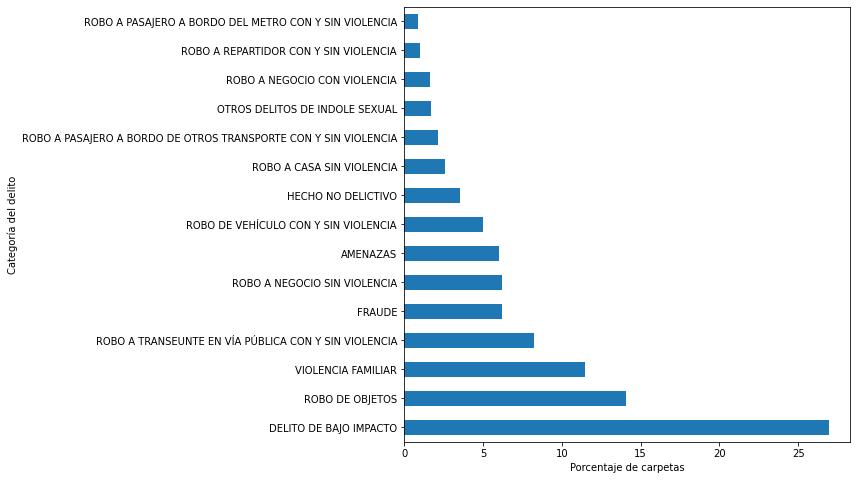

In [ ]:
plt.figure(figsize=(8,8))
(FGJ_carpetas.groupby([FGJ_carpetas['categoria_delito_homo']]).size().sort_values(ascending=False)*100/len(FGJ_carpetas['categoria_delito']))[:15].plot(kind='barh')
#plt.title('Porcentaje de delitos por categoría')
plt.ylabel('Categoría del delito')
plt.xlabel('Porcentaje de carpetas')
plt.savefig(path+'IMG/'+'carpetas_homo.png',
            bbox_inches ="tight",
            pad_inches = 0.5,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')
plt.show()

In [ ]:
delito_bajo = FGJ_carpetas[FGJ_carpetas["categoria_delito_homo"] == "DELITO DE BAJO IMPACTO"]

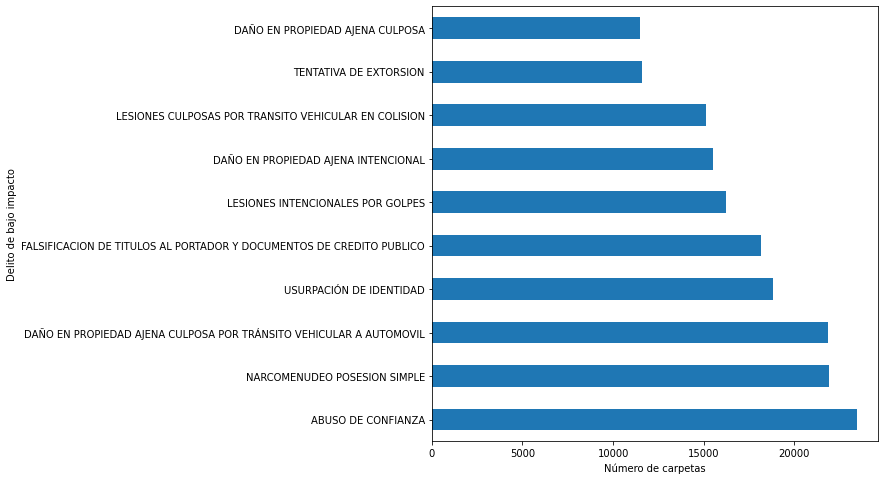

In [ ]:
plt.figure(figsize=(8,8))
(delito_bajo['delito'].value_counts(normalize=False)[:10]).plot(kind='barh')
#plt.title('Porcentaje de delitos por categoría')
plt.ylabel('Delito de bajo impacto')
plt.xlabel('Número de carpetas')
plt.savefig(path+'IMG/'+'carpetas_bajo.png',
            bbox_inches ="tight",
            pad_inches = 0.5,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')
plt.show()

In [ ]:
FGJ_carpetas.to_csv(path+"FGJ_carpetas_homo.csv",index=True)

#### Graficas del archivo de carpetas

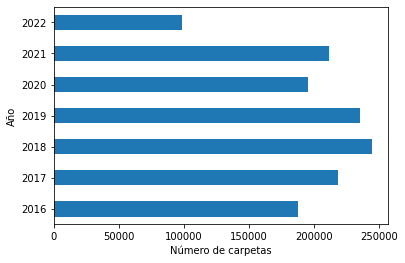

In [ ]:
FGJ_carpetas.groupby([FGJ_carpetas.index.year]).size().plot(kind = "barh", title = "")
plt.xlabel("Número de carpetas")
plt.ylabel("Año")
plt.savefig(path+'IMG/'+'carpetas_year.png',
            bbox_inches ="tight",
            pad_inches = 0.5,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')

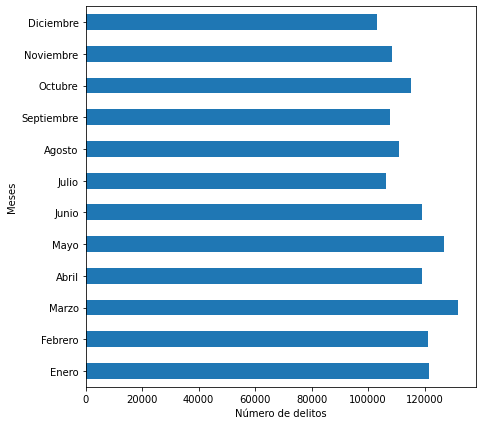

In [ ]:
mes = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre",
      "Noviembre", "Diciembre"]
plt.figure(figsize=(7,7))
FGJ_carpetas.groupby([FGJ_carpetas.index.month]).size().plot(kind='barh', title = "")
plt.xlabel("Número de delitos")
plt.ylabel("Meses")
plt.yticks(np.arange(12),mes)
plt.savefig(path+'IMG/'+'carpetas_month.png',
            bbox_inches ="tight",
            pad_inches = 0.5,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')
plt.show()

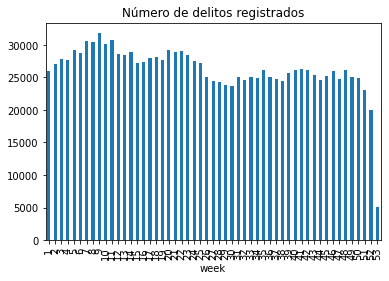

In [ ]:
FGJ_carpetas.groupby([FGJ_carpetas.index.isocalendar().week]).size().plot(kind = "bar", title = "Número de delitos registrados")

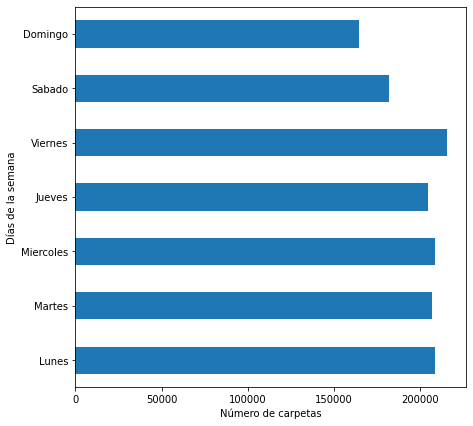

In [ ]:
dias = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
plt.figure(figsize=(7,7))
FGJ_carpetas.groupby([FGJ_carpetas.index.dayofweek]).size().plot(kind='barh', title = "")
plt.xlabel("Número de carpetas")
plt.ylabel("Días de la semana")
plt.yticks(np.arange(7),dias)
plt.savefig(path+'IMG/'+'carpetas_day.png',
            bbox_inches ="tight",
            pad_inches = 0.5,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')
plt.show()

#### Graficas del archivo de llamadas

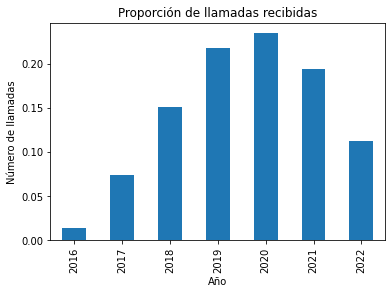

In [ ]:
llamadas.FECHA_ALTA.dt.year.value_counts(normalize=True).sort_index().plot(kind = "bar", 
                    title = "Proporción de llamadas recibidas")
plt.ylabel("Número de llamadas")
plt.xlabel("Año")
plt.savefig(path+'IMG/'+'llamadas_year.png',
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')

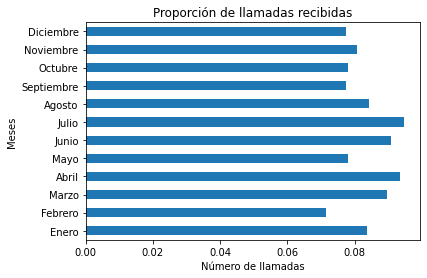

In [ ]:
mes = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre",
      "Noviembre", "Diciembre"]
llamadas.FECHA_ALTA.dt.month.value_counts(normalize=True).sort_index().plot(kind = "barh", 
                    title = "Proporción de llamadas recibidas")
plt.yticks(np.arange(12),mes)
plt.xlabel("Número de llamadas")
plt.ylabel("Meses")
plt.savefig(path+'IMG/'+'llamadas_month.png',
            bbox_inches ="tight",
            pad_inches = 0.5,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')
plt.show()

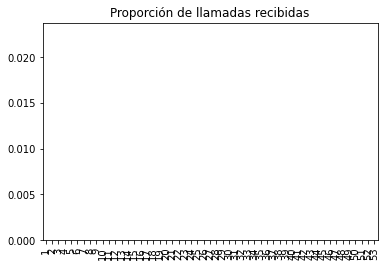

In [ ]:
llamadas.FECHA_ALTA.dt.isocalendar().week.value_counts(normalize=True).sort_index().plot(kind = "bar", 
                    title = "Proporción de llamadas recibidas",
            facecolor ="w",
            edgecolor ='w',
            orientation ='vertical')
#plt.savefig(path+'IMG/'+'llamadas_week.png')

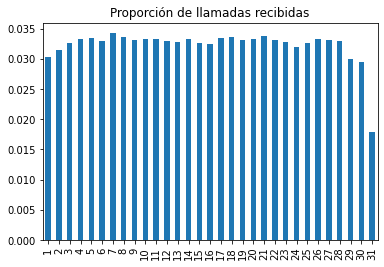

In [ ]:
llamadas.FECHA_ALTA.dt.day.value_counts(normalize=True).sort_index().plot(kind = "bar", 
                    title = "Proporción de llamadas recibidas")
#plt.savefig(path+'IMG/'+'llamadas_day.png')

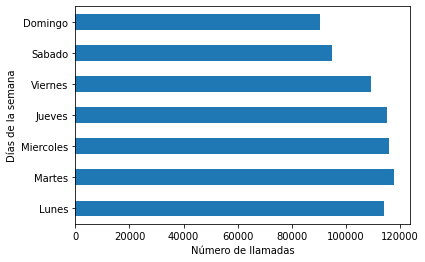

In [ ]:
dias = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
llamadas.groupby([llamadas.index.dayofweek]).size().plot(kind='barh', title = "")
plt.xlabel("Número de llamadas")
plt.ylabel("Días de la semana")
plt.yticks(np.arange(7),dias)
plt.savefig(path+'IMG/'+'llamadas_day.png',
            bbox_inches ="tight",
            pad_inches = 0.5,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')
plt.show()

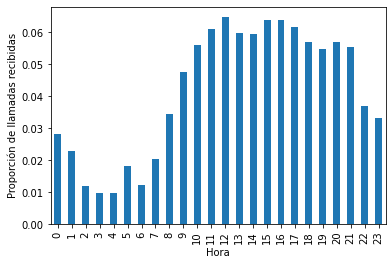

In [ ]:
llamadas.FECHA_ALTA.dt.hour.value_counts(normalize=True).sort_index().plot(kind = "bar", 
                    title = "")
plt.ylabel("Proporción de llamadas recibidas")
plt.xlabel("Hora")
plt.savefig(path+'IMG/'+'llamadas_hour.png',
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')

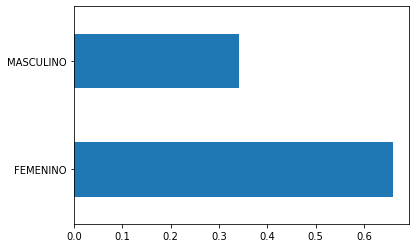

In [ ]:
llamadas.SEXO.value_counts(normalize=True).sort_index().plot(kind = "barh", 
                    title = "")
plt.savefig(path+'IMG/'+'llamadas_sexo.png',
            bbox_inches ="tight",
            pad_inches = 0.5,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')

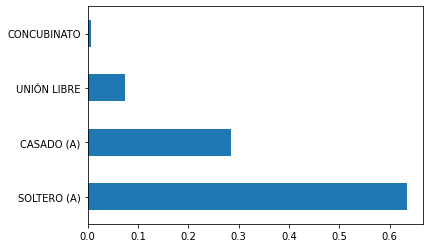

In [ ]:
llamadas.ESTADO_CIVIL.value_counts(normalize=True).plot(kind = "barh", 
                    title = "")
plt.savefig(path+'IMG/'+'llamadas_civl.png',
            bbox_inches ="tight",
            pad_inches = 0.5,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')

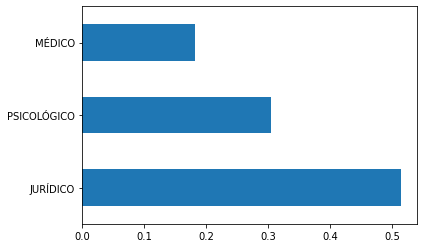

In [ ]:
llamadas.SERVICIO.value_counts(normalize=True).plot(kind = "barh", 
                    title = "")
plt.savefig(path+'IMG/'+'llamadas_servicio.png',
            bbox_inches ="tight",
            pad_inches = 0.2,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')

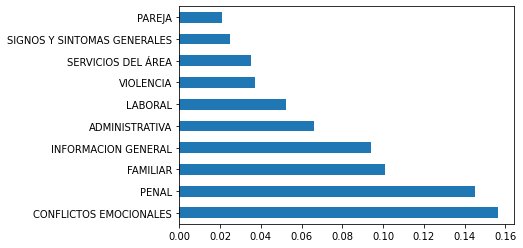

In [ ]:
llamadas.TEMATICA_1.value_counts(normalize=True)[:10].plot(kind = "barh", 
                    title = "")
plt.savefig(path+'IMG/'+'llamadas_tematica.png',
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')

## Series de tiempo

In [ ]:
FGJ_carpetas = pd.read_csv(path+'FGJ_carpetas_homo.csv', parse_dates=["fecha_hechos"]) 
FGJ_carpetas.index = pd.DatetimeIndex(FGJ_carpetas.fecha_hechos)

In [ ]:
top_cat=FGJ_carpetas['categoria_delito_homo'].value_counts().index[:10]

In [ ]:
cat_day = FGJ_carpetas.pivot_table("delito",columns="categoria_delito_homo", index = FGJ_carpetas['fecha_hechos'].dt.to_period('D'), 
                        aggfunc=np.size, fill_value=0)

In [ ]:
idx_day=np.where(cat_day.index.dayofyear==366)[0]
cat_day.iloc[idx_day+1,:]=np.ceil((np.array(cat_day.iloc[idx_day,:])+np.array(cat_day.iloc[idx_day+1,:]))/2)
cat_day=cat_day.loc[cat_day.index.dayofyear!=366,:]

In [ ]:
cat_day.loc[:,top_cat].rolling(1).sum().plot(figsize=(16, 30), subplots=True, layout=(5, 2), 
                                          sharex=False, sharey=False,xlabel="Fecha",ylabel="Núm. de delitos")
plt.savefig(path+'IMG/'+'cat_ts_day.png',
              bbox_inches ="tight",
              pad_inches = 0.5,
              transparent = True,
              facecolor ="w",
              edgecolor ='w',
              orientation ='landscape')

In [ ]:
cat_week = FGJ_carpetas.pivot_table("delito",columns="categoria_delito_homo", index = FGJ_carpetas['fecha_hechos'].dt.to_period('W'), 
                        aggfunc=np.size, fill_value=0)

In [ ]:
idx_week=np.where(cat_week.index.week==53)[0]
cat_week.iloc[idx_week+1,:]=np.ceil((np.array(cat_week.iloc[idx_week,:])+np.array(cat_week.iloc[idx_week+1,:]))/2)
cat_week=cat_week.loc[cat_week.index.week!=53,:]

'plt.savefig(path+\'IMG/\'+\'cat_ts_week.png\',\n              bbox_inches ="tight",\n              pad_inches = 0.5,\n              transparent = True,\n              facecolor ="w",\n              edgecolor =\'w\',\n              orientation =\'landscape\')'

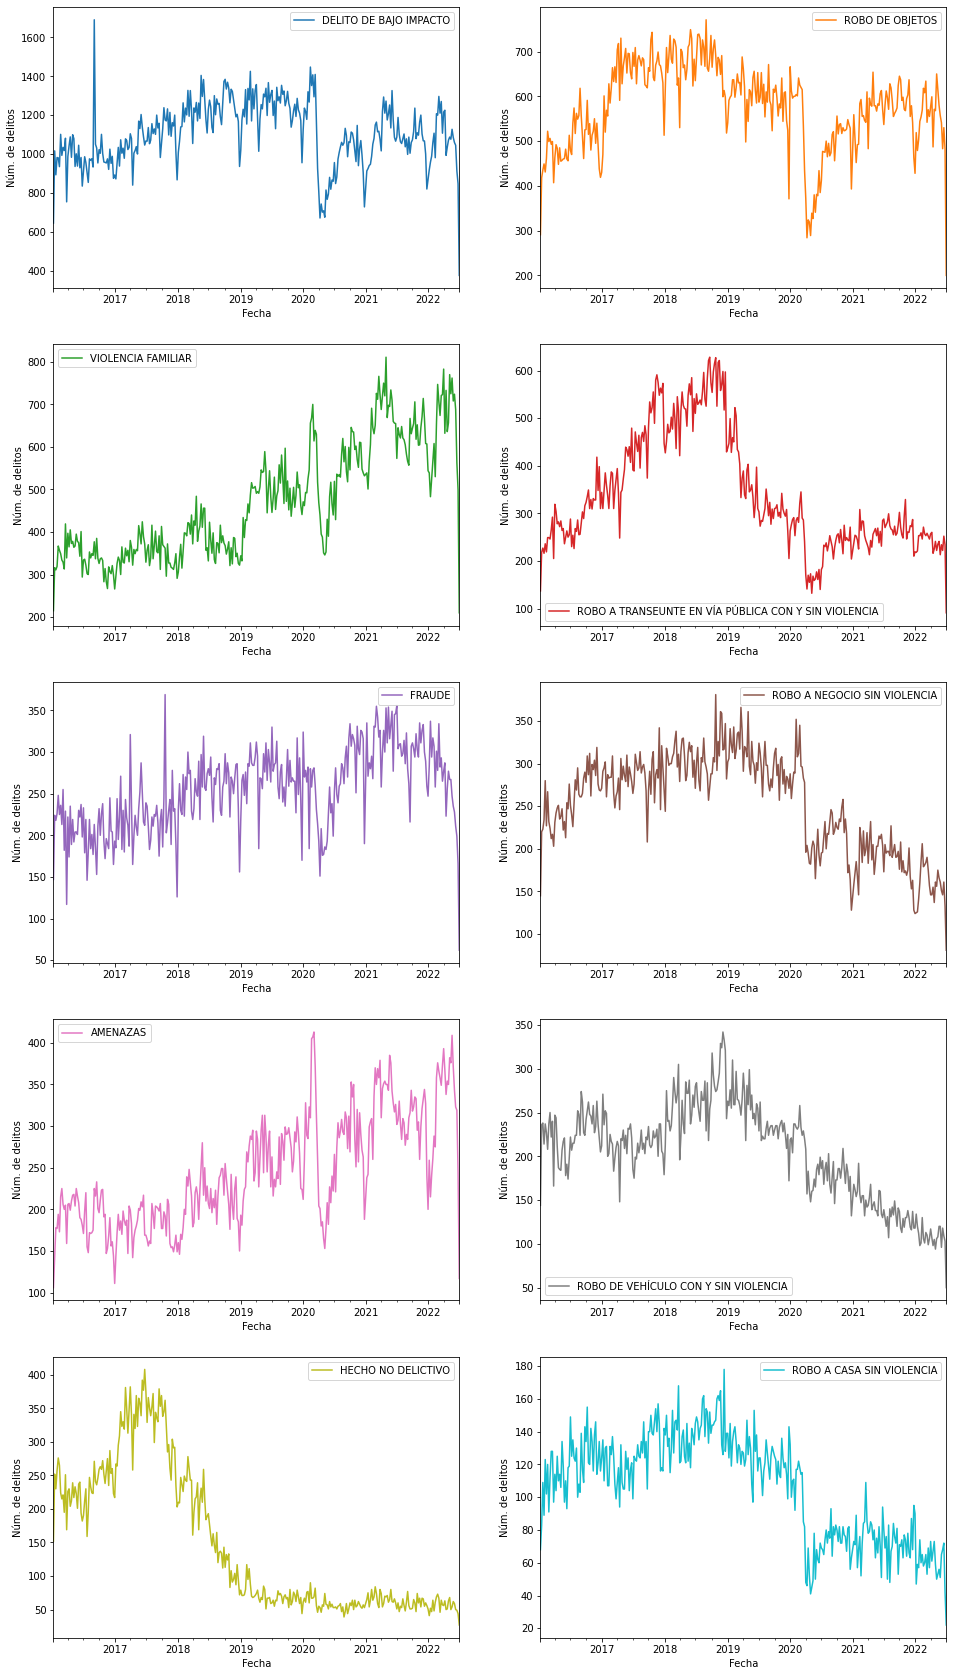

In [ ]:
cat_week.loc[:,top_cat].rolling(1).sum().plot(figsize=(16, 30), subplots=True, layout=(5, 2), 
                                          sharex=False, sharey=False,xlabel="Fecha",ylabel="Núm. de delitos")
'''plt.savefig(path+'IMG/'+'cat_ts_week.png',
              bbox_inches ="tight",
              pad_inches = 0.5,
              transparent = True,
              facecolor ="w",
              edgecolor ='w',
              orientation ='landscape')'''

In [ ]:
#Para modelos arima
ts_train=cat_week[cat_week.index<='2022'][top_cat]
ts_test=cat_week[cat_week.index>'2022'][top_cat]

### Series de tiempo para los servicios de llamadas

In [ ]:
top_tema=llamadas['TEMATICA_1'].value_counts().index[:10]

In [ ]:
call_day = llamadas.pivot_table("SEXO",columns="SERVICIO",aggfunc=np.size,fill_value=0,index=llamadas['FECHA_ALTA'].dt.to_period('D'))

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [ ]:
idx_day=np.where(call_day.index.dayofyear==366)[0]
call_day.iloc[idx_day+1,:]=np.ceil((np.array(call_day.iloc[idx_day,:])+np.array(call_day.iloc[idx_day+1,:]))/2)
call_day=call_day.loc[call_day.index.dayofyear!=366,:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ddfabb4d0>],
      dtype=object)

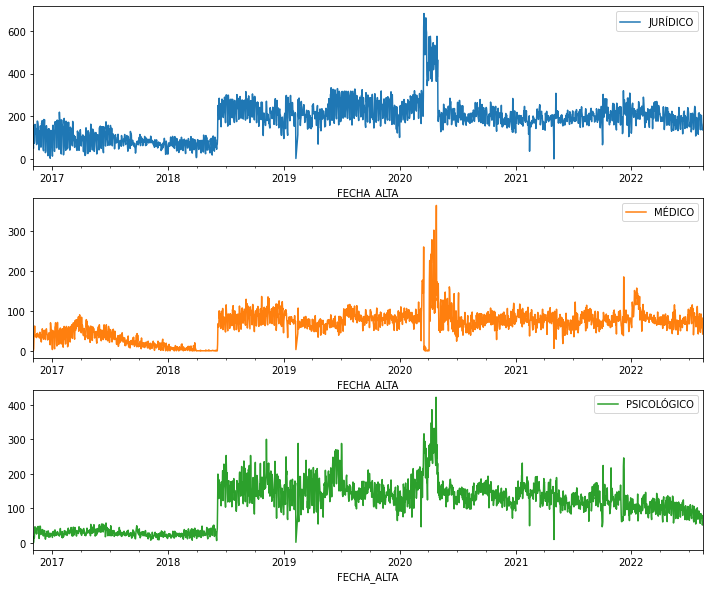

In [ ]:
call_day.rolling(1).sum().plot(figsize=(12, 10), subplots=True, layout=(3, 1), sharex=False, sharey=False)

In [ ]:
call_week = llamadas.pivot_table("SEXO",columns="SERVICIO",aggfunc=np.size,fill_value=0,index=llamadas['FECHA_ALTA'].dt.to_period('W'))

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [ ]:
idx_week=np.where(call_week.index.week==53)[0]
call_week.iloc[idx_week+1,:]=np.ceil((np.array(call_week.iloc[idx_week,:])+np.array(call_week.iloc[idx_week+1,:]))/2)
call_week=call_week.loc[call_week.index.week!=53,:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ddf7a9150>],
      dtype=object)

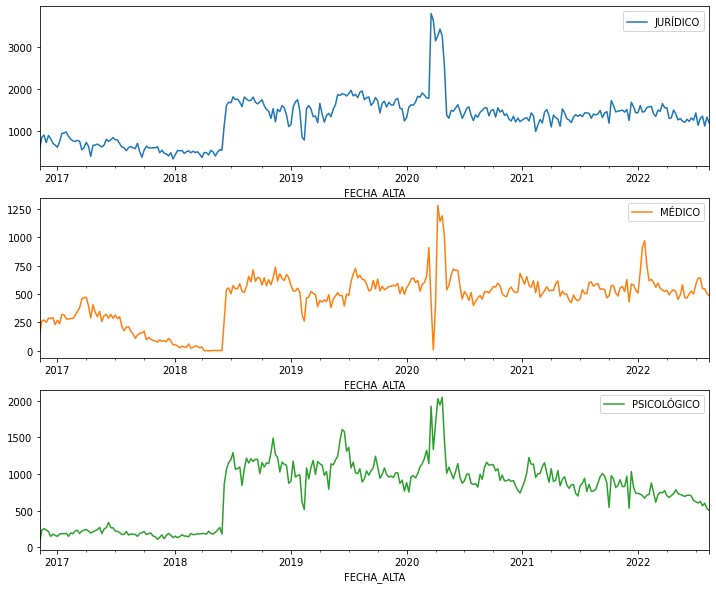

In [ ]:
call_week.rolling(1).sum().plot(figsize=(12, 10), subplots=True, layout=(3, 1), sharex=False, sharey=False)

In [ ]:
call_week.to_csv(path+"call_week.csv",index=True)

In [ ]:
tema_day = llamadas.pivot_table("SEXO",columns="TEMATICA_1",aggfunc=np.size,fill_value=0,index=llamadas['FECHA_ALTA'].dt.to_period('D'))

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [ ]:
idx_day=np.where(tema_day.index.dayofyear==366)[0]
tema_day.iloc[idx_day+1,:]=np.ceil((np.array(tema_day.iloc[idx_day,:])+np.array(tema_day.iloc[idx_day+1,:]))/2)
tema_day=tema_day.loc[tema_day.index.dayofyear!=366,:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ddf480ed0>,
      dtype=object)

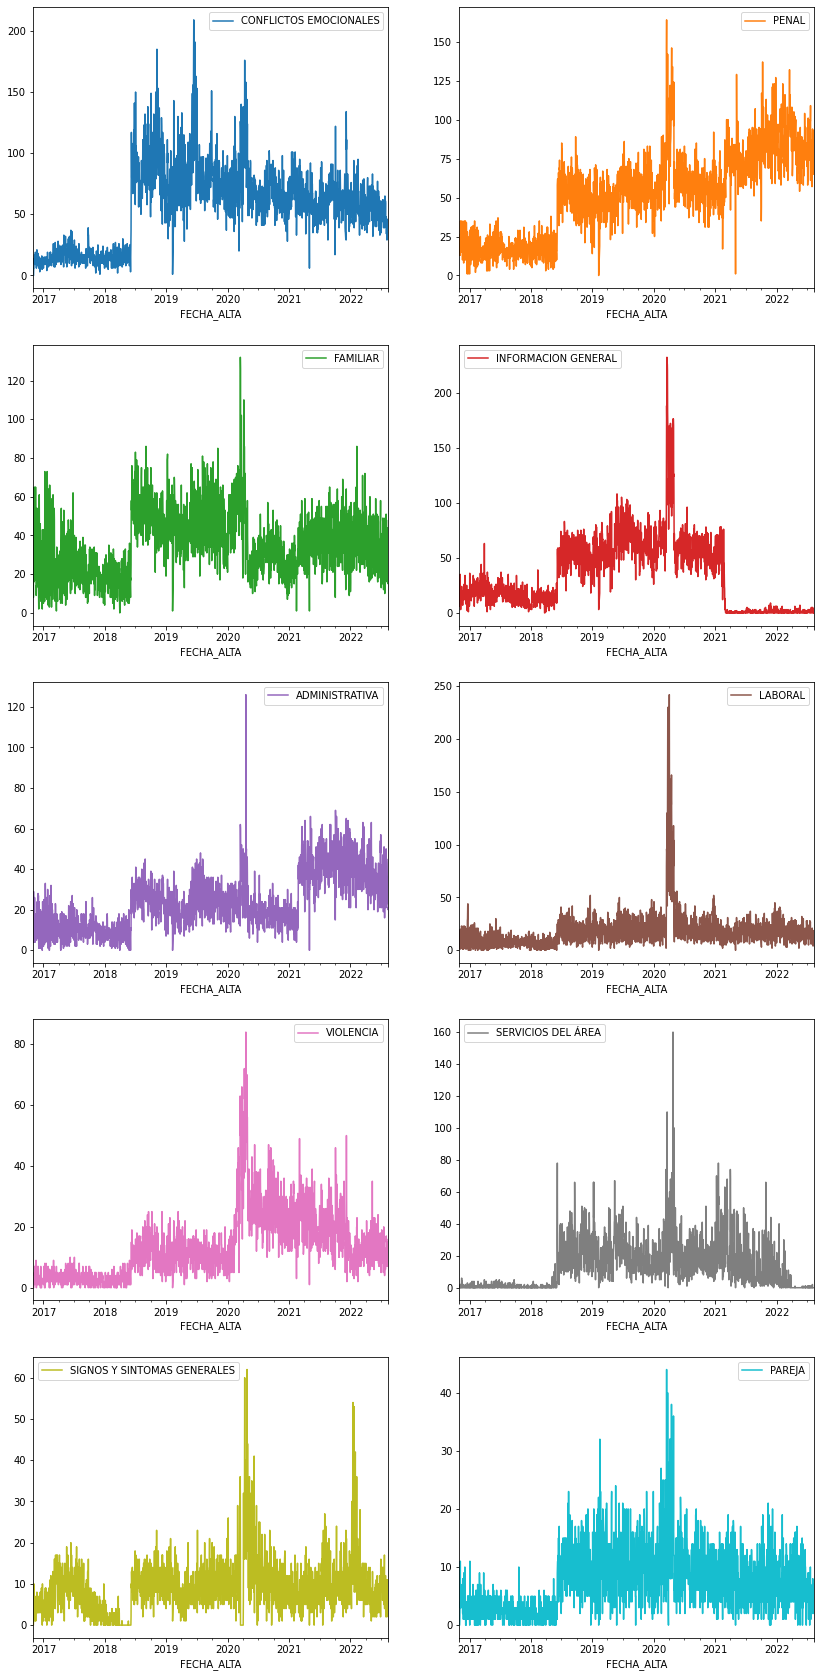

In [ ]:
tema_day.loc[:,top_tema].rolling(1).sum().plot(figsize=(14, 30), subplots=True, layout=(5, 2), sharex=False, sharey=False)

In [ ]:
tema_week = llamadas.pivot_table("SEXO",columns="TEMATICA_1",aggfunc=np.size,fill_value=0,index=llamadas['FECHA_ALTA'].dt.to_period('W'))

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [ ]:
idx_week=np.where(tema_week.index.week==53)[0]
tema_week.iloc[idx_week+1,:]=np.ceil((np.array(tema_week.iloc[idx_week,:])+np.array(tema_week.iloc[idx_week+1,:]))/2)
tema_week=tema_week.loc[tema_week.index.week!=53,:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ddea69950>,
      dtype=object)

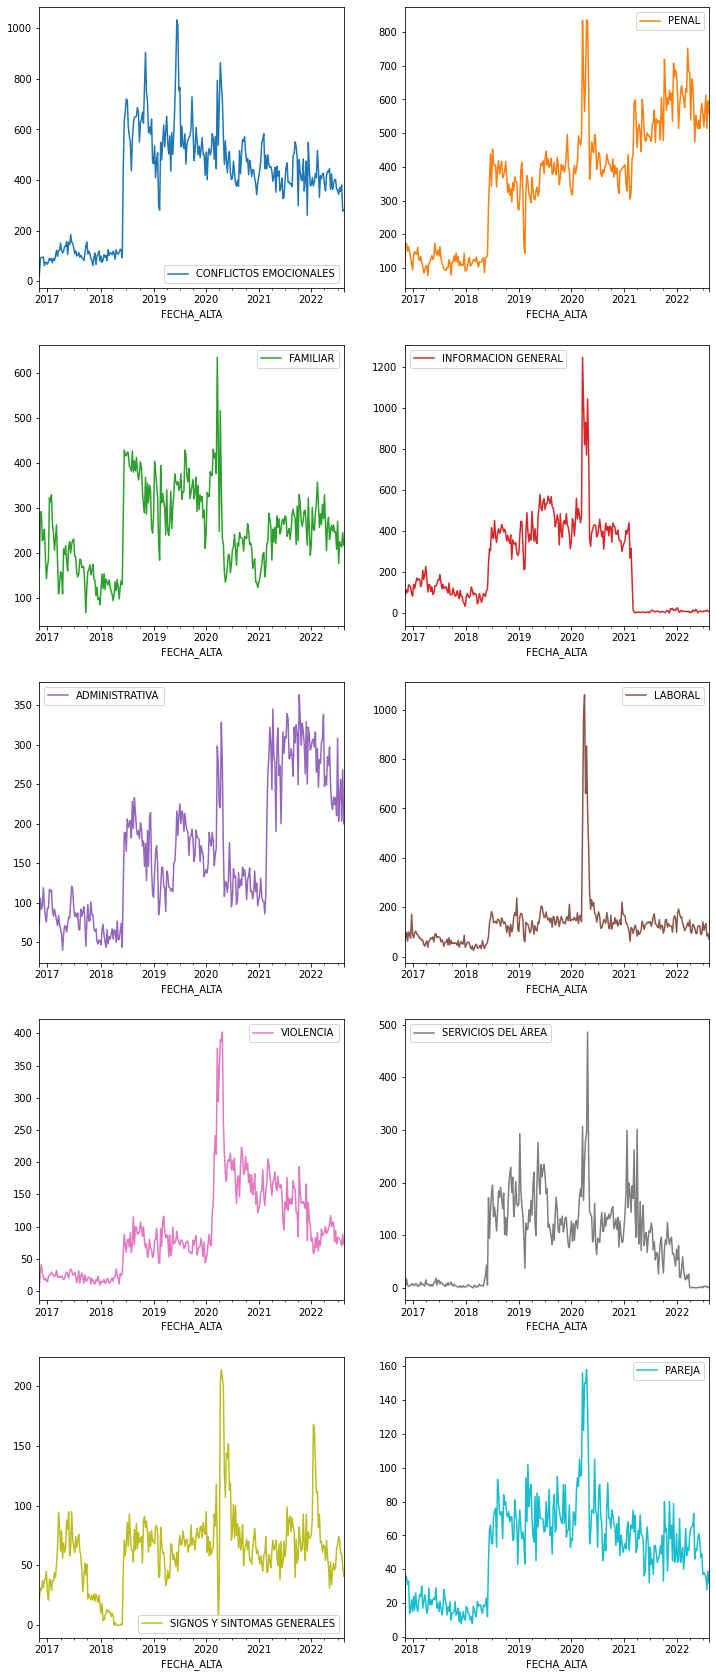

In [ ]:
tema_week.loc[:,top_tema].rolling(1).sum().plot(figsize=(12, 30), subplots=True, layout=(5, 2), sharex=False, sharey=False)

In [ ]:
tema_week.to_csv(path+"tema_week.csv",index=True)

## CLUSTERING

In [ ]:
!pip install tslearn

In [ ]:
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.preprocessing import StandardScaler
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score

In [ ]:
km_euc = TimeSeriesKMeans(n_clusters=4, 
                          verbose=2, 
                          n_init=10, 
                          metric="euclidean").fit(cat_week.transpose())
labels_euc = km_euc.labels_
print(silhouette_score(cat_week.transpose(), labels_euc, metric="euclidean"))
print(labels_euc)

Init 1
341813.588 --> 225554.955 --> 225554.955 --> 
Init 2
660149.235 --> 436359.631 --> 326357.920 --> 225554.955 --> 225554.955 --> 
Init 3
366222.588 --> 225554.955 --> 225554.955 --> 
Init 4
355574.588 --> 225554.955 --> 225554.955 --> 
Init 5
337240.000 --> 225554.955 --> 225554.955 --> 
Init 6
353093.765 --> 225554.955 --> 225554.955 --> 
Init 7
548174.353 --> 438791.012 --> 438791.012 --> 
Init 8
337240.000 --> 225554.955 --> 225554.955 --> 
Init 9
540158.118 --> 438791.012 --> 438791.012 --> 
Init 10
337240.000 --> 225554.955 --> 225554.955 --> 
0.6779753370146933
[1 2 3 2 2 2 2 2 2 2 2 2 0 2 0 2 2]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29b5894510>,
      dtype=object)

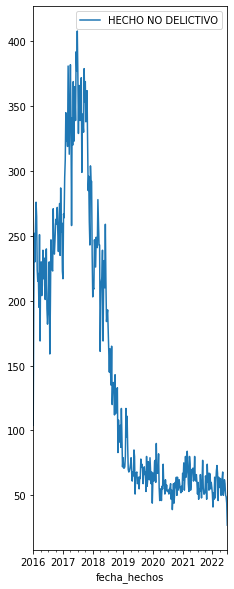

In [ ]:
cat_week.iloc[:,labels_euc==3].plot(figsize=(16, 10), subplots=True, layout=(-1, 4), sharex=False, sharey=False)

In [ ]:
km_dtw = TimeSeriesKMeans(n_clusters=4, 
                          verbose=2, 
                          n_init=10, 
                          metric="dtw").fit(cat_week.transpose())
labels_dtw = km_dtw.labels_
print(silhouette_score(cat_week.transpose(), labels_dtw, metric="dtw"))
print(labels_dtw)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcac2c36690>,
      dtype=object)

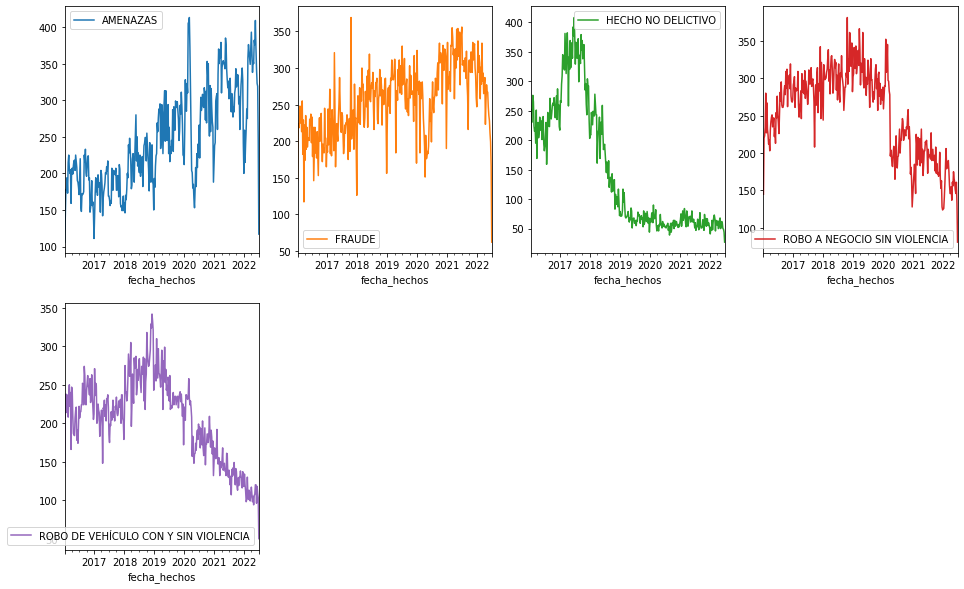

In [ ]:
cat_week.iloc[:,labels_dtw==0].plot(figsize=(16, 10), subplots=True, layout=(-1, 4), sharex=False, sharey=False)

## MODELACIÓN SARIMA

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.6 MB/s 
     |████████████████████████████████| 9.8 MB 31.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pmdarima as pm
from scipy import stats 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import joblib
import pickle

In [ ]:
ts_train=cat_week[cat_week.index<'2022'][top_cat]
ts_test=cat_week[cat_week.index>='2022'][top_cat]

In [ ]:
for i in range(10):
  decomposition = seasonal_decompose(ts_train.iloc[:,i], model="additive",  period=52)
  trend = decomposition.trend
  seasonal = decomposition.seasonal
  residual = decomposition.resid

  plt.figure(figsize=(12,8))
  plt.subplot(411)
  ts_train.iloc[:,0].plot(label = "Original", color = "blue")
  plt.xlabel('')
  plt.legend(loc = "best")
  plt.subplot(412)
  trend.plot(label = "Tendencia", color = "blue")
  plt.xlabel('')
  plt.legend(loc = "best")
  plt.subplot(413)
  seasonal.plot( label = "Estacionaliedad", color = "blue")
  plt.xlabel('')
  plt.legend(loc = "best")
  plt.subplot(414)
  residual.plot( label = "Residuos", color = "blue")
  plt.xlabel('')
  plt.legend(loc = "best")
  plt.xlabel('Fecha')

  plt.savefig(path+'IMG/'+'decom_ts'+str(i)+'.png',
              bbox_inches ="tight",
              pad_inches = 0.5,
              transparent = True,
              facecolor ="w",
              edgecolor ='w',
              orientation ='landscape')
  plt.show()

In [ ]:
plt.figsize=(16, 30)
plt.subplots=True
for i in range(10):
  #Tranformacion logaritmica para suavizar la avarianza
  ts_week=np.log(ts_train.iloc[:,i])
  #Diferencia de orden 1 para eliminar tendencia observada
  ts_week=np.diff(ts_week,1)
  #Prueba de estacionalidad si p_value>0.05 no se rechaza hipotesis 
  #H0=la serie no es estacionaria
  #HA=la serie no es estacionaria
  print(adfuller(ts_week)[1])
  if(adfuller(np.diff(ts_week,1))[1]>0.05):
    plt.plot(ts_week)

In [ ]:
parametros=[]
for i in range(9,-1,-1):
  ts_week=np.log(ts_train.iloc[:,i])
  model = pm.auto_arima(ts_week, 
                        test='adf',
                        seasonal=True,
                        m=52,
                        d=1,
                        D=0,
                        start_p=0,
                        start_q=0,
                        max_p=3, 
                        max_q=3,
                        trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True,
                        random_state=0)
  
  parametros.append(model.get_params().update({'model': FGJ_carpetas.columns[i]}))
    
np.save(path+'sarima_modelos.npy', parametros)

In [ ]:
parametros=np.load(path+'sarima_model.npy', allow_pickle='TRUE').tolist()
parametros

[{'maxiter': 50,
  'method': 'lbfgs',
  'order': (1, 1, 1),
  'out_of_sample_size': 0,
  'scoring': 'mse',
  'scoring_args': {},
  'seasonal_order': (0, 0, 0, 52),
  'start_params': None,
  'suppress_warnings': True,
  'trend': None,
  'with_intercept': False,
  'delito': 'ROBO A CASA SIN VIOLENCIA'},
 {'maxiter': 50,
  'method': 'lbfgs',
  'order': (0, 1, 1),
  'out_of_sample_size': 0,
  'scoring': 'mse',
  'scoring_args': {},
  'seasonal_order': (0, 0, 0, 52),
  'start_params': None,
  'suppress_warnings': True,
  'trend': None,
  'with_intercept': False,
  'delito': 'HECHO NO DELICTIVO'},
 {'maxiter': 50,
  'method': 'lbfgs',
  'order': (0, 1, 1),
  'out_of_sample_size': 0,
  'scoring': 'mse',
  'scoring_args': {},
  'seasonal_order': (0, 0, 0, 52),
  'start_params': None,
  'suppress_warnings': True,
  'trend': None,
  'with_intercept': True,
  'delito': 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA'},
 {'maxiter': 50,
  'method': 'lbfgs',
  'order': (0, 1, 1),
  'out_of_sample_size': 0,
 

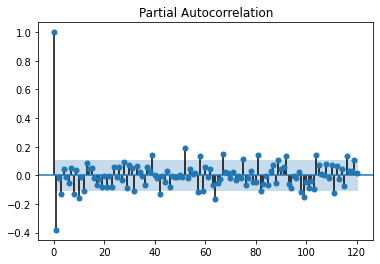

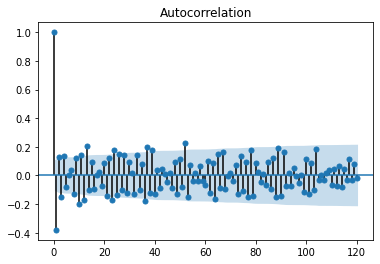

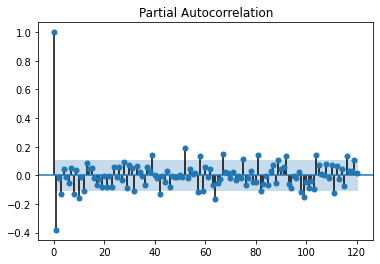

In [ ]:
plot_acf(np.diff(cat_week.loc[:,top_cat].iloc[:,0],1),lags=120)
plot_pacf(np.diff(cat_week.loc[:,top_cat].iloc[:,0],1),lags=120)

In [ ]:
'''parametros.append({'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 1, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (1, 0, 2, 52),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False,
 'delito': ts_train.columns[0]})'''

In [ ]:
'''joblib.dump(model, 'arima_ts'+str(6)+'.pkl')
joblib_preds = joblib.load('arima_ts6.pkl').predict(n_periods=5)
joblib_preds

with open('arima_ts'+str(6)+'.pkl', 'wb') as pkl:
    pickle.dump(model, pkl)
with open('arima_ts'+str(6)+'.pkl', 'rb') as pkl:
    pickle_preds = pickle.load(pkl).predict(n_periods=5)
'''

                                      SARIMAX Results                                      
Dep. Variable:        ROBO A NEGOCIO SIN VIOLENCIA   No. Observations:                  311
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 52)   Log Likelihood                 288.807
Date:                             Mon, 17 Oct 2022   AIC                           -571.615
Time:                                     16:22:03   BIC                           -560.405
Sample:                                 01-10-2016   HQIC                          -567.133
                                      - 12-26-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5364      0.040    -13.405      0.000      -0.615      -0.458
ar.S.L52       0.2063      

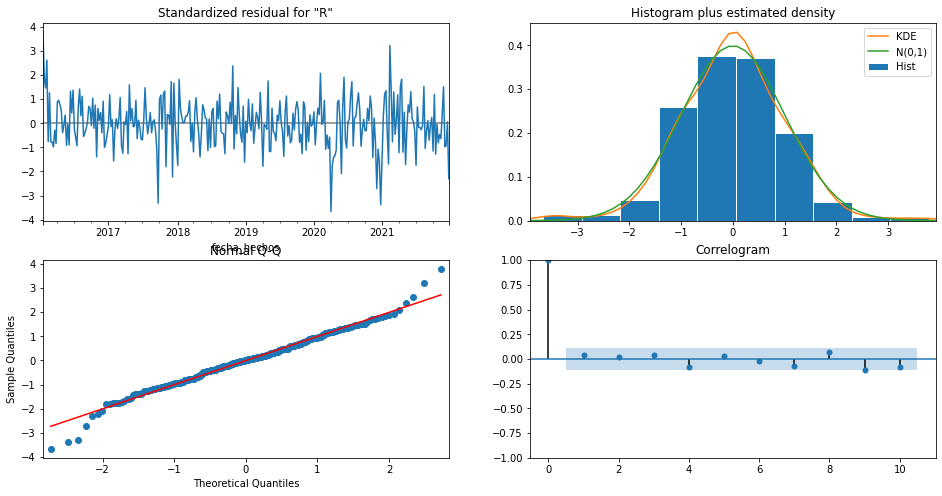

In [ ]:
i=5
model=SARIMAX(np.log(ts_train.iloc[:,i]), order=parametros[i]['order'], seasonal_order=parametros[i]['seasonal_order'])
result=model.fit()
print(result.summary())
result.plot_diagnostics(figsize=(16,8))
plt.show()

MSE 53817.51
RMSE 231.99
MAPE 11.64


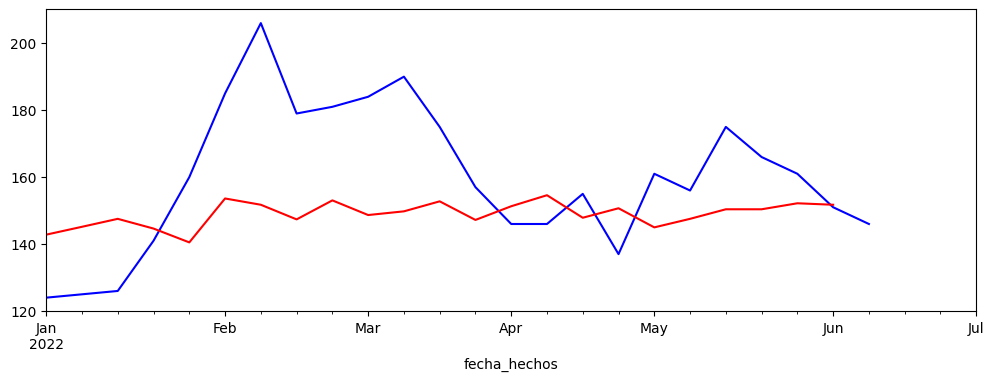

In [ ]:
# Forecast
n_periods = 24
fitted = np.exp(result.get_forecast(n_periods).predicted_mean)

fitted_series = pd.Series(fitted, index=ts_test.iloc[:,i].index)
plt.figure(figsize=(12,4), dpi=100)
ts_test.iloc[:n_periods,i].plot(color="blue")
fitted_series.plot(color='red')

mse = ((fitted_series - ts_test.iloc[:n_periods,i]) ** 2).mean()*100
mape = (np.abs(fitted_series - ts_test.iloc[:n_periods,i])/np.abs(ts_test.iloc[:n_periods,i])).mean()*100
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))
print('MAPE {}'.format(round(mape, 2)))

## CNN

In [ ]:
!pip install datasets

In [ ]:
from torch.utils.data import Dataset, TensorDataset, DataLoader
from datasets import load_dataset, get_dataset_config_names
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import gc
from torch.optim import Adam
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Funcion que crea los inpunt de manera x_1,x_2,..,x_t con output x_{t+1}
def create_input_output(serie, n):
    x, y = [],[]
    for i in range(len(serie)):
        idx_output=i+n
        if(idx_output>=len(serie)):
          break
        else:
          x.append(serie[i:idx_output])
          y.append(serie[idx_output])
    return x,y

In [ ]:
#Eleccion de serie(tipo de delito)
i=0

#Numero de años a proporcionar para que se forme el entrenamiento
n=4

#Funcion de normalizacion
scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform((ts_train.iloc[:,i].values).reshape(-1,1))

train_data = pd.DataFrame(train_data_normalized[:52*n].reshape(52*n), index=cat_week.index[:52*n])
val_data = pd.DataFrame(train_data_normalized[52*n:].reshape(52*(6-n)), index=cat_week.index[52*n:312])
test_data = scaler.transform((ts_test.iloc[:,i].values).reshape(-1,1))

In [ ]:
#Clase de tipo Data set para series de tiempo
class TimeSeriesDataset(Dataset):
    def __init__(self,input,output):
        self.x = input
        self.y = output
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]

In [ ]:
#Convertir nuestra serie de tiempo a un formato de input, output como lo requiere una red
train_input,train_output = create_input_output(train_data.values.reshape(len(train_data)),3)
val_input, val_output = create_input_output(val_data.values.reshape(len(val_data)),3)
test_input, test_output = create_input_output(test_data.reshape(len(test_data)),3)

In [ ]:
#Convertimos nuestros conjuntos al tipo de dataset
train_dataset = TimeSeriesDataset(train_input,train_output)
val_dataset = TimeSeriesDataset(val_input, val_output)
test_dataset=TimeSeriesDataset(test_input, test_output)

In [ ]:
#Cargamos el data set en el data loader
train_loader = DataLoader(train_dataset, batch_size=1,shuffle=False)
val_loader = DataLoader(train_dataset, batch_size=1,shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=1,shuffle=False)

In [ ]:
for i, d in enumerate(train_loader):
    print(i, d)

In [ ]:
#Creamos la arquitectura de la red
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1d = nn.Conv1d(1,64,kernel_size=1)
        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(64*3,50)
        self.fc2 = nn.Linear(50,1)
        
    def forward(self,x):
        x = self.conv1d(x.float())
        x = self.relu(x)
        x = x.view(-1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        
        return x

In [ ]:
def CalcValLoss(model, loss_fn, val_loader):
    model.eval()
    with torch.no_grad():
        Y_shuffled, Y_preds, losses = [],[],[]
        for X, Y in tqdm(val_loader):
            X = X.to(device)
            Y = Y.to(device)
            preds = model(X)
            loss = loss_fn(preds, Y)
            losses.append(loss.item())

        print("Validacion MSE : {:.3f}".format(torch.tensor(losses).mean()))
    return(torch.tensor(losses).mean()) 

def TrainModel(model, loss_fn, optimizer, train_loader, val_loader, epochs=10,tol=5):
    error_opt=np.inf
    k=0
    i_opt=0

    for i in range(1, epochs+1):
        losses = []

        for X, Y in tqdm(train_loader):
            X = X.to(device)
            Y = Y.to(device)
            Y_preds = model(X)

            loss = loss_fn(Y_preds.float(), Y.float())
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print("Train Loss : {:.3f}".format(torch.tensor(losses).mean()))
        error_val=CalcValLoss(model, loss_fn, val_loader).numpy()
        
        if(error_val<error_opt):
              error_opt = error_val
              i_opt = i
              k = 0
              torch.save(model.state_dict(),path)
              
        else:
          k=k+1
          if(k>=tol):
            model.load_state_dict(torch.load(path))
            break 


def MakePredictions(model, loader):
  with torch.no_grad():
    Y_shuffled, Y_preds = [], []
    for X, Y in loader:
        X = X.to(device)
        Y = Y.to(device)
        preds = model(X)
        Y_preds.append(preds.cpu().numpy()[0])
  
  return Y_preds

In [ ]:
#Definimos nuestro espacio de trabajo como gpu para que sea mas rapido el analisis
if torch.cuda.is_available():       
    device = torch.device("cuda")
    torch.cuda.manual_seed(20)
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
    torch.manual_seed(20)

No GPU available, using the CPU instead.


In [ ]:
#Declaramos hiperparametros y llamamos la funcion de entrenamiento
path='/content/drive/My Drive/Proyecto_CD/cnn_ts.pth'

epochs = 100
tol = 10
learning_rate = 1e-3

loss_fn = nn.MSELoss()
predicter = CNN()
predicter=predicter.to(device)
optimizer = Adam(predicter.parameters(), lr=learning_rate)

TrainModel(predicter, loss_fn, optimizer, train_loader, val_loader, epochs,tol)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.044


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.106


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.046


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.076


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.042


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.077


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.042


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.068


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.041


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.060


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.039


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.060


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.039


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.058


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.038


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.057


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.039


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.058


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.038


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.054


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.037


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.053


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.037


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.052


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.037


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.051


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.037


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.050


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.048


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.049


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.047


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.047


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.046


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.045


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.045


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.045


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.046


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.044


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.043


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.037


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.046


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.043


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.043


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.042


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.042


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.041


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.041


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.041


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.040


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.040


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.039


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.039


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.039


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.039


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.039


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.040


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.039


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.037


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.038


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.043


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.037


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.037


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.037


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.037


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.036


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.032


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.032


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.033


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.034


  0%|          | 0/205 [00:00<?, ?it/s]

Train Loss : 0.032


  0%|          | 0/205 [00:00<?, ?it/s]

Validacion MSE : 0.035


In [ ]:
y_pred_cnn_scaler = MakePredictions(predicter,test_loader)
y_pred_cnn = scaler.inverse_transform(np.array(y_pred_cnn_scaler).reshape(-1,1))

MSE 2514084.41
RMSE 1585.59
MAPE 13.73


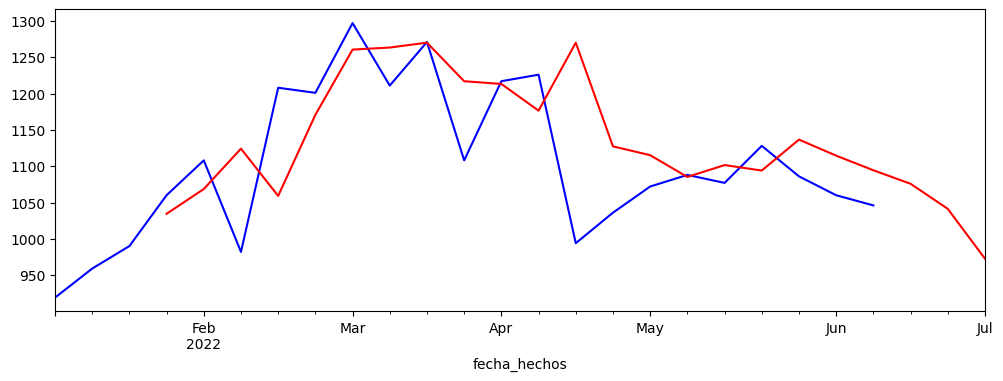

In [ ]:
# Forecast
y_pred_cnn=y_pred_cnn.reshape(y_pred_cnn.shape[0])
fitted_series = pd.Series(y_pred_cnn, index=ts_test.iloc[3:,i].index)
plt.figure(figsize=(12,4), dpi=100)
ts_test.iloc[:n_periods,i].plot(color="blue")
fitted_series.plot(color='red')


mse = ((y_pred_cnn - ts_test.iloc[3:,i]) ** 2).mean()*100
mape = (np.abs(y_pred_cnn - ts_test.iloc[3:,i])/np.abs(ts_test.iloc[3:,i])).mean()*100
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))
print('MAPE {}'.format(round(mape, 2)))

In [ ]:
class RNN(nn.Module):
    def __init__(self, inputSize, hiddenSize, numLayers,sequenceLength,num_classes):
        super().__init__()
        self.num_layers = numLayers
        self.input_size = inputSize
        self.hidden_size = hiddenSize
        self.seq_len = sequenceLength
        self.RNN = nn.RNN(input_size=inputSize, 
                          hidden_size=hiddenSize, 
                          num_layers=numLayers, 
                          nonlinearity='tanh', 
                          batch_first=True) #inputs and outputs are  (batch, seq, feature)
        self.linear = nn.Linear(hiddenSize,num_classes)
        
    def forward(self,x):
        x=x.reshape([x.size(0),self.seq_len, 1]).float()
        hState = torch.zeros([self.num_layers, x.size(0), self.hidden_size])
        x, h = self.RNN(x,hState)
        out = self.linear(x[:,-1,:]) # gets last output
        return out

In [ ]:
#Declaramos hiperparametros y llamamos la funcion de entrenamiento
path='/content/drive/My Drive/Proyecto_CD/rnn_ts.pth'

epochs = 100
tol = 10
learning_rate = 1e-3

n_pred =1
num_feature = 1
seq_length=3

loss_fn = nn.MSELoss()
predicter = RNN(num_feature,4,2,seq_length,n_pred)
predicter=predicter.to(device)
optimizer = Adam(predicter.parameters(), lr=learning_rate)

TrainModel(predicter, loss_fn, optimizer, train_loader, val_loader, epochs,tol)

In [ ]:
y_pred_rnn_scaler = MakePredictions(predicter,test_loader)
y_pred_rnn = scaler.inverse_transform(np.array(y_pred_rnn_scaler).reshape(-1,1))

MSE 2588796.72
RMSE 1608.97
MAPE 14.09


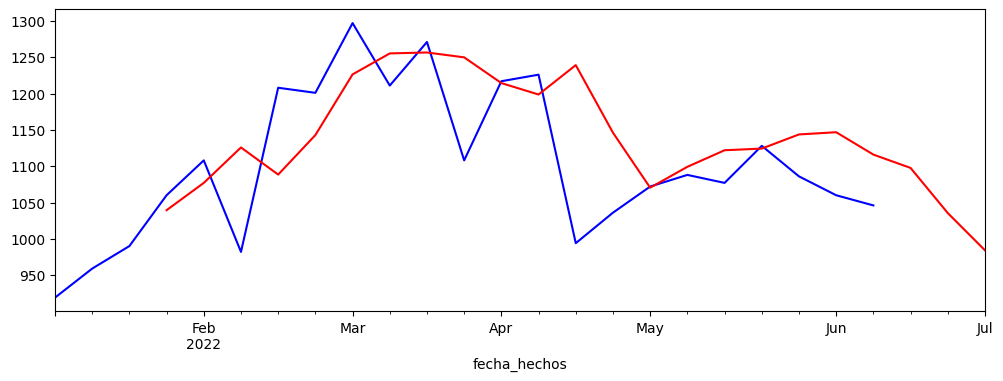

In [ ]:
# Forecast
y_pred_rnn=y_pred_rnn.reshape(y_pred_rnn.shape[0])
fitted_series_rnn = pd.Series(y_pred_rnn, index=ts_test.iloc[3:,i].index)
plt.figure(figsize=(12,4), dpi=100)
ts_test.iloc[:n_periods,i].plot(color="blue")
fitted_series_rnn.plot(color='red')


mse = ((y_pred_rnn - ts_test.iloc[3:,i]) ** 2).mean()*100
mape = (np.abs(y_pred_rnn - ts_test.iloc[3:,i])/np.abs(ts_test.iloc[3:,i])).mean()*100
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))
print('MAPE {}'.format(round(mape, 2)))

In [ ]:
class LSTM(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers,sequenceLength, num_classes):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_len = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x=x.reshape([x.size(0),self.seq_len, 1]).float()
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        # Propagate input through LSTM
        _, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        
        return out

In [ ]:
#Declaramos hiperparametros y llamamos la funcion de entrenamiento
path='/content/drive/My Drive/Proyecto_CD/lstm_ts.pth'

epochs = 100
tol = 10
learning_rate = 1e-3

num_feature = 1
seq_length=3
n_pred =1

loss_fn = nn.MSELoss()
predicter = LSTM(num_feature,4,2,seq_length,n_pred)
predicter=predicter.to(device)
optimizer = Adam(predicter.parameters(), lr=learning_rate)

TrainModel(predicter, loss_fn, optimizer, train_loader, val_loader, epochs,tol)

In [ ]:
y_pred_lstm_scaler = MakePredictions(predicter,test_loader)
y_pred_lstm = scaler.inverse_transform(np.array(y_pred_lstm_scaler).reshape(-1,1))

MSE 2624591.88
RMSE 1620.06
MAPE 14.3


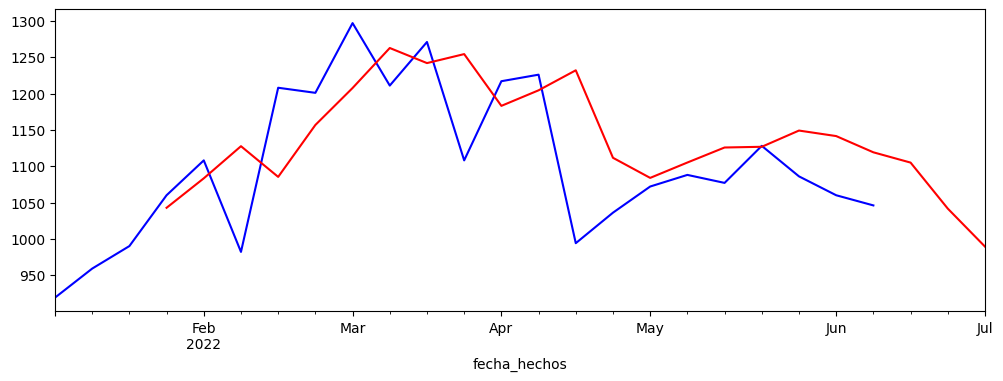

In [ ]:
# Forecast
y_pred_lstm = y_pred_lstm.reshape(y_pred_lstm.shape[0])
fitted_series_lstm = pd.Series(y_pred_lstm, index=ts_test.iloc[3:,i].index)
plt.figure(figsize=(12,4), dpi=100)
ts_test.iloc[:n_periods,i].plot(color="blue")
fitted_series_lstm.plot(color='red')


mse = ((y_pred_lstm - ts_test.iloc[3:,i]) ** 2).mean()*100
mape = (np.abs(y_pred_lstm - ts_test.iloc[3:,i])/np.abs(ts_test.iloc[3:,i])).mean()*100
print('MSE {}'.format(round(mse, 2)))
print('RMSE {}'.format(round(np.sqrt(mse), 2)))
print('MAPE {}'.format(round(mape, 2)))

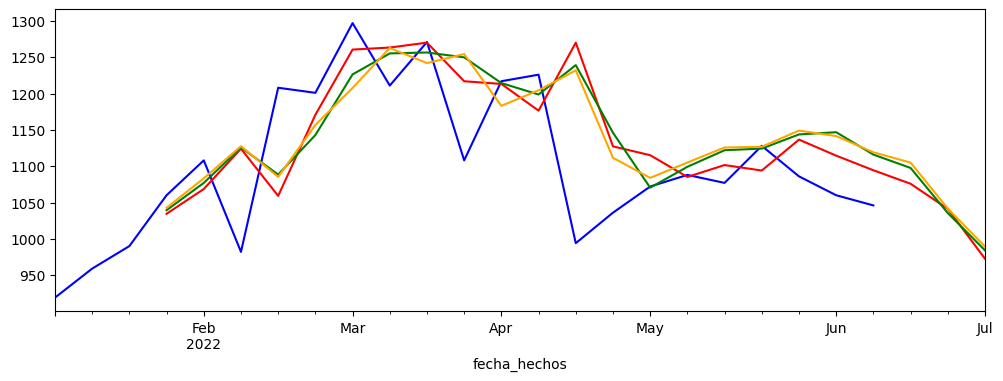

In [ ]:
# Forecast
plt.figure(figsize=(12,4), dpi=100)
ts_test.iloc[:n_periods,i].plot(color="blue")
fitted_series.plot(color='red')
fitted_series_rnn.plot(color='green')
fitted_series_lstm.plot(color='orange')

In [ ]:
class GRU(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(GRU, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        # Propagate input through LSTM
        _, h_out = self.gru(x, h_0)
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        
        return out